
# Week 14

# Lab: Unsupervised Learning

- Dimentionalty Reduction
  - PCA
  - t-SNE
- Clustering
  - k-means
  - GMM
- Implementing k-means


In [1]:
import pandas as pd
import random
import numpy as np

df = pd.read_csv('data.csv')
random.seed(10)
np.random.seed(10)
df = df.sample(frac=1).reset_index(drop=True)
df_target = df['target']
df = df.drop('target', axis=1)

df

,X1,X2,X3,X4
0,6.3,2.3,4.4,1.3
1,6.4,2.7,5.3,1.9
2,5.4,3.7,1.5,0.2
3,6.1,3.0,4.6,1.4
4,5.0,3.3,1.4,0.2
...,...,...,...,...
145,5.7,2.5,5.0,2.0
146,5.6,2.9,3.6,1.3
147,5.7,4.4,1.5,0.4
148,7.2,3.2,6.0,1.8


array([[<Axes: xlabel='X1', ylabel='X1'>,
        <Axes: xlabel='X2', ylabel='X1'>,
        <Axes: xlabel='X3', ylabel='X1'>,
        <Axes: xlabel='X4', ylabel='X1'>],
       [<Axes: xlabel='X1', ylabel='X2'>,
        <Axes: xlabel='X2', ylabel='X2'>,
        <Axes: xlabel='X3', ylabel='X2'>,
        <Axes: xlabel='X4', ylabel='X2'>],
       [<Axes: xlabel='X1', ylabel='X3'>,
        <Axes: xlabel='X2', ylabel='X3'>,
        <Axes: xlabel='X3', ylabel='X3'>,
        <Axes: xlabel='X4', ylabel='X3'>],
       [<Axes: xlabel='X1', ylabel='X4'>,
        <Axes: xlabel='X2', ylabel='X4'>,
        <Axes: xlabel='X3', ylabel='X4'>,
        <Axes: xlabel='X4', ylabel='X4'>]], dtype=object)

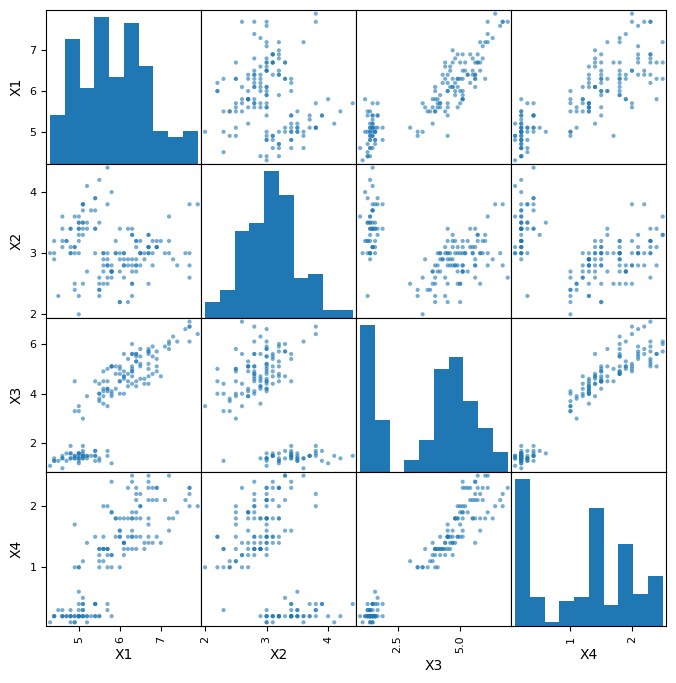

In [2]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.6, figsize=(8, 8), diagonal='hist')


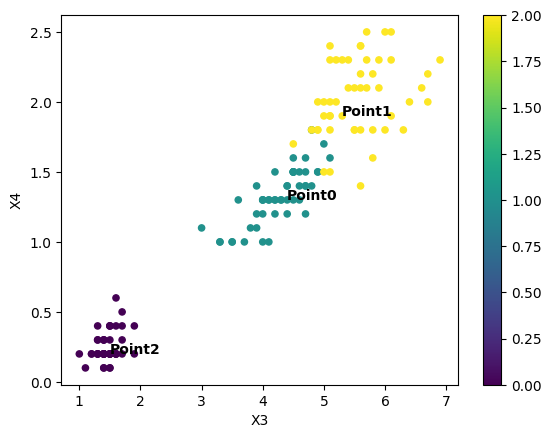

In [3]:
import matplotlib.pyplot as plt

featue1 = "X3"
featue2 = "X4"

ax = df.plot(x=featue1, y=featue2, kind='scatter', c=df_target, cmap='viridis') #
for i in range(3):
    ax.text(df.loc[i, featue1], df.loc[i, featue2], 'Point{}'.format(i), weight='bold')
plt.show()



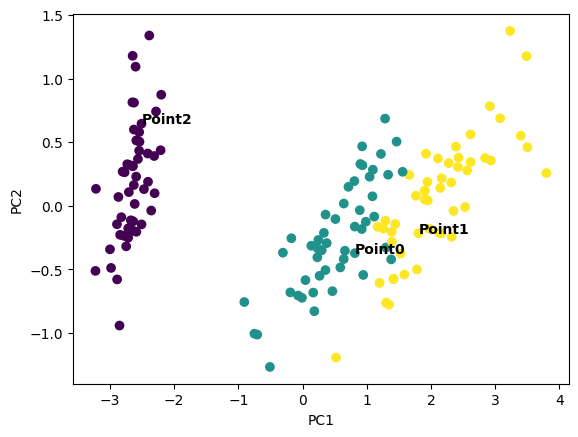

In [4]:
from sklearn.decomposition import PCA

# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit and transform the data
X_pca = pca.fit_transform(df)

# plot the PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_target, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

# add text labels to the first 3 points
for i in range(3):
    plt.text(X_pca[i, 0], X_pca[i, 1], 'Point{}'.format(i), weight='bold')

plt.show()


# t-SNE?

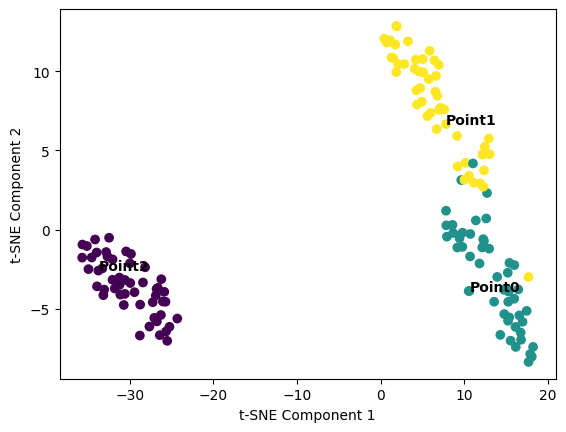

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=20, random_state=42) # default value is 30

X_embedded = tsne.fit_transform(df)

# plot the embedding
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df_target, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# add text labels to the first 3 points
for i in range(3):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], 'Point{}'.format(i), weight='bold')

plt.show()

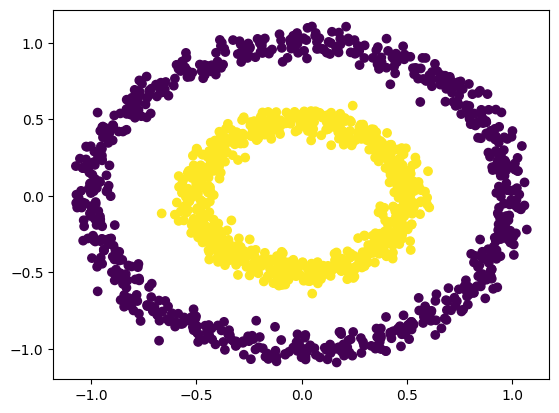

In [6]:
from sklearn import datasets

noisy_circles = datasets.make_circles(
    n_samples=1500, factor=0.5, noise=0.05, random_state=170
)

plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1],c=noisy_circles[1]) #
plt.show()





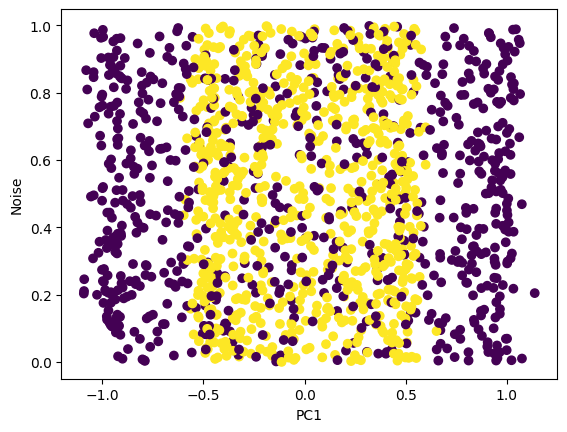

In [7]:
# create a PCA object with 2 components
pca = PCA(n_components=1)

# fit and transform the data
X_pca_circle = pca.fit_transform(noisy_circles[0])

# plot the PCA components
plt.scatter(X_pca_circle[:, 0], np.random.uniform(0, 1, size=len(X_pca_circle)), c=noisy_circles[1]) #
plt.xlabel('PC1')
plt.ylabel('Noise')

plt.show()

Text(0, 0.5, 'Noise')

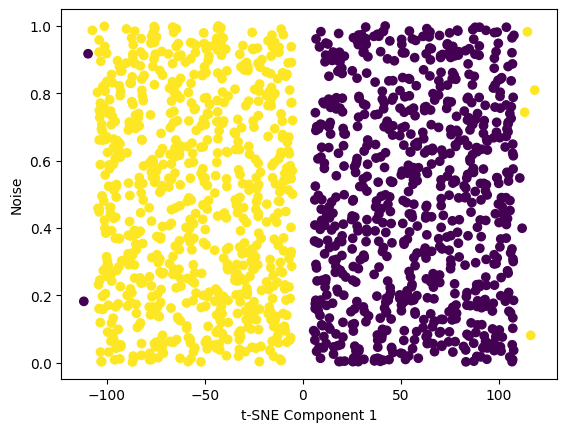

In [8]:

tsne = TSNE(n_components=1, perplexity=40, n_iter=15000, learning_rate=1000, random_state=42)
X_tsne = tsne.fit_transform(noisy_circles[0])

# plot the embedding
plt.scatter(X_tsne[:,0], np.random.uniform(0, 1, size=len(X_tsne)), c=noisy_circles[1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('Noise')

## MNIST Dataset
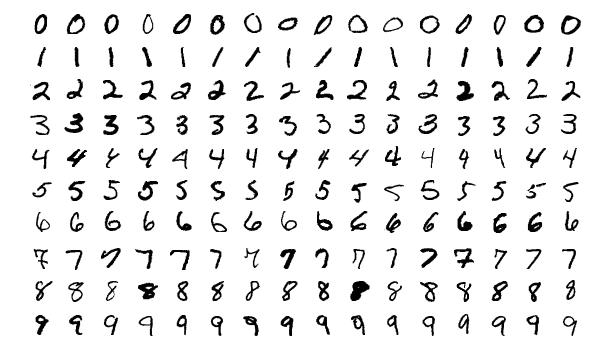


[0.09849888 0.07317929]


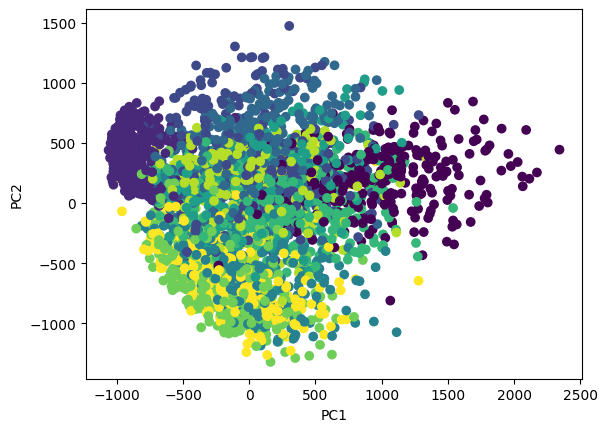

In [9]:
df_mnist = pd.read_csv('mnist_train.csv')
X = df_mnist.iloc[:, 1:][:3000]
y = df_mnist.iloc[:, 0][:3000]


# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit and transform the data
X_pca_MNIST = pca.fit_transform(X)

# print the explained variance ratio
print(pca.explained_variance_ratio_)

# plot the PCA components
plt.scatter(X_pca_MNIST[:, 0], X_pca_MNIST[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


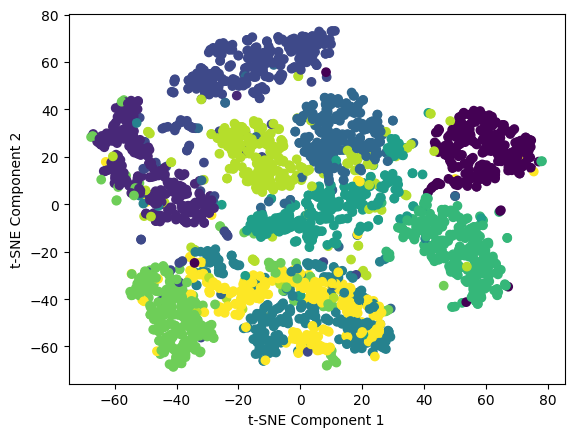

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
X_embedded = tsne.fit_transform(X)

# plot the embedding
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# add text labels to the first 3 points


plt.show()


# Clustering

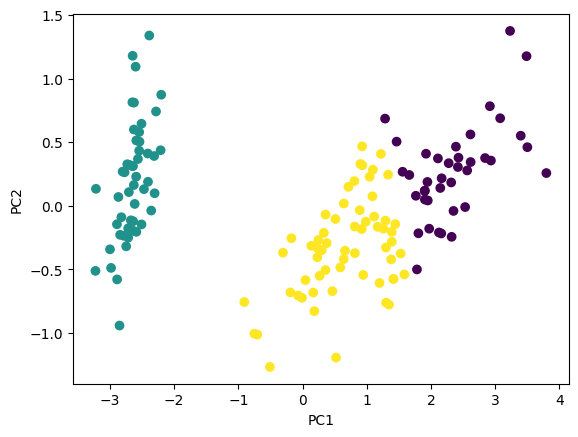

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')

# fit the data
kmeans.fit(df)

# get the cluster labels
labels = kmeans.labels_

# plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()


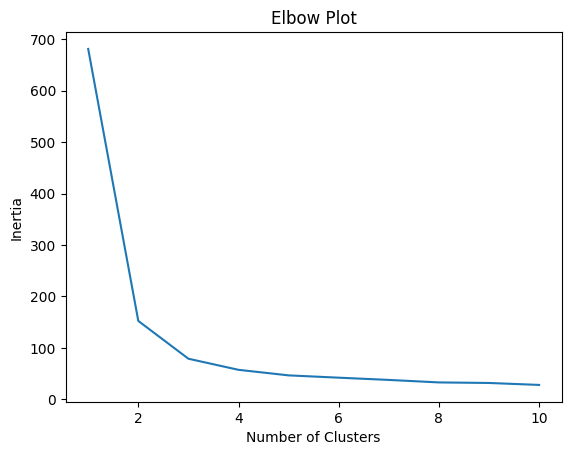

In [12]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


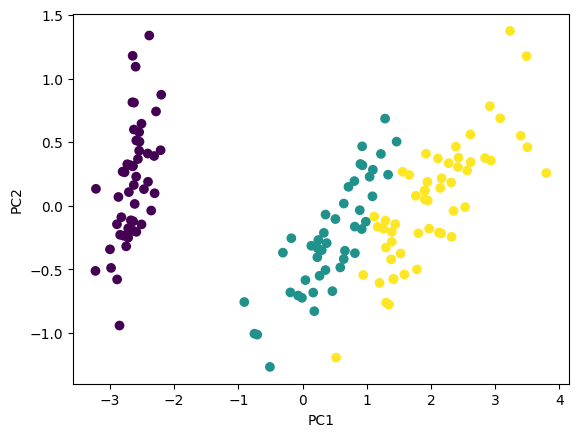

In [13]:
from sklearn.mixture import GaussianMixture

# create a GaussianMixture object with ? components
gmm = GaussianMixture(n_components=3)

# fit the data
gmm.fit(df)

# get the cluster labels
labels = gmm.predict(df)

# plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()


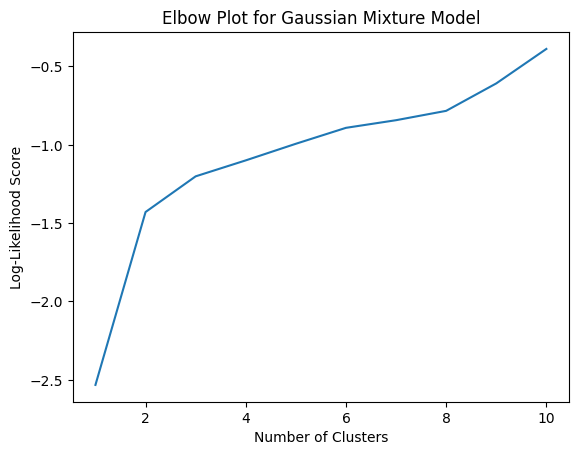

In [14]:
# create a list to store the log-likelihood scores for different number of clusters
log_likelihood_scores = []

# fit the Gaussian Mixture model for different number of clusters
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(df)
    log_likelihood_scores.append(gmm.score(df)) #try gm.bic(df)

# plot the elbow plot
plt.plot(range(1, 11), log_likelihood_scores)
plt.title('Elbow Plot for Gaussian Mixture Model')
plt.xlabel('Number of Clusters')
plt.ylabel('Log-Likelihood Score')
plt.show()


# k-means Implementation

In [15]:
def k_means(X, k, max_iterations=np.inf):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    labels = None
    old_labels = None
    iteration = 0
    while (old_labels is None or not np.array_equal(labels,old_labels)) and iteration < max_iterations:
      old_labels = labels
      iteration += 1
      distance = np.sqrt(((X-centroids[:,np.newaxis])**2).sum(axis=2))
      labels = np.argmin(distance, axis=0)
      if iteration < max_iterations:
        for j in range(k):
          centroids[j] = X[labels == j].mean(axis=0)

    return labels, centroids

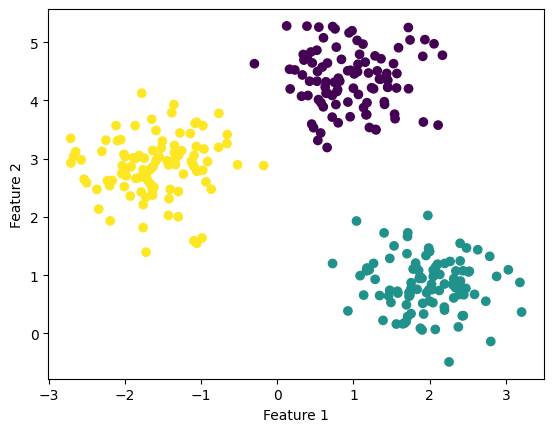

In [16]:
from sklearn.datasets import make_blobs

# create data with 3 round clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

# plot the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


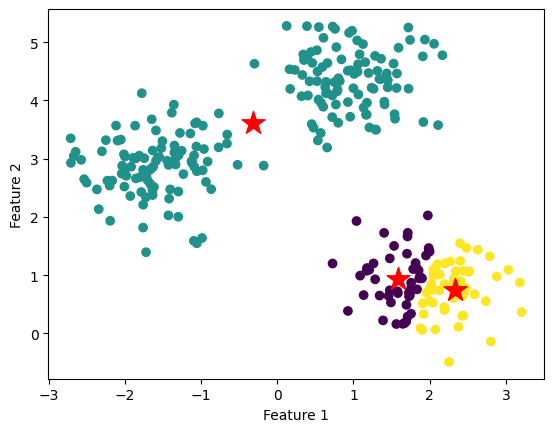

In [17]:
np.random.seed(837)
labels, centroids = k_means(X, k=3, max_iterations=100)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



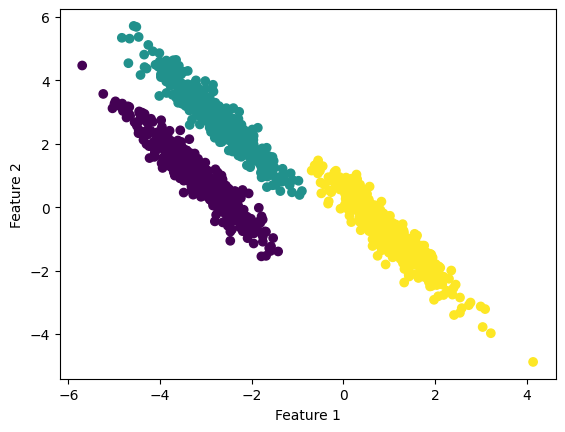

In [18]:
X, y = datasets.make_blobs(n_samples=1500, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


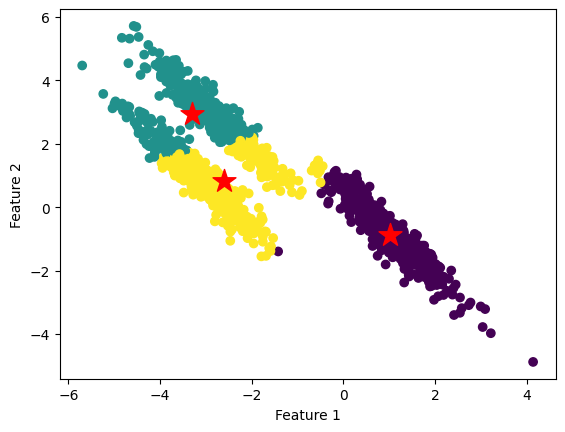

In [19]:
np.random.seed(837)
labels, centroids = k_means(X, k=3, max_iterations=100)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()